# Butterworth Filter

## Setup Python

In [49]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy import signal
from scipy.io import wavfile

from IPython.display import Audio, display
%matplotlib inline

In [50]:
def play(x, fs, autoplay=False):
    display(Audio(x, rate=fs, autoplay=autoplay))

In [51]:
mpl.rcParams['font.size']      = 18
mpl.rcParams['font.weight']    = 'bold'
mpl.rcParams['axes.grid']      = True
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['figure.figsize'] = 1.5*np.array([8.0, 6.0])
mpl.rcParams['axes.xmargin']   = 0
mpl.rcParams['axes.ymargin']   = 0.1

In [52]:
def plot_sig(fs,x,title=None):
    """
    Plot signal and spectrogram.
    
    fs: sampling frequency
    x:  signal
    """
    k = np.arange(len(x))
    T = 1/fs
    
    plt.subplot(211)
    plt.plot(k*T,x)
    plt.xlabel('kT [sec]')
    plt.ylabel('x(kT)')
    
    if title is not None:
        plt.title(title)

    plt.subplot(212)
    f, t, Sxx = signal.spectrogram(x, fs)
    plt.pcolormesh(t, f, 10.*np.log10(Sxx))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    
    plt.tight_layout()
    plt.show()

## Load Wav File

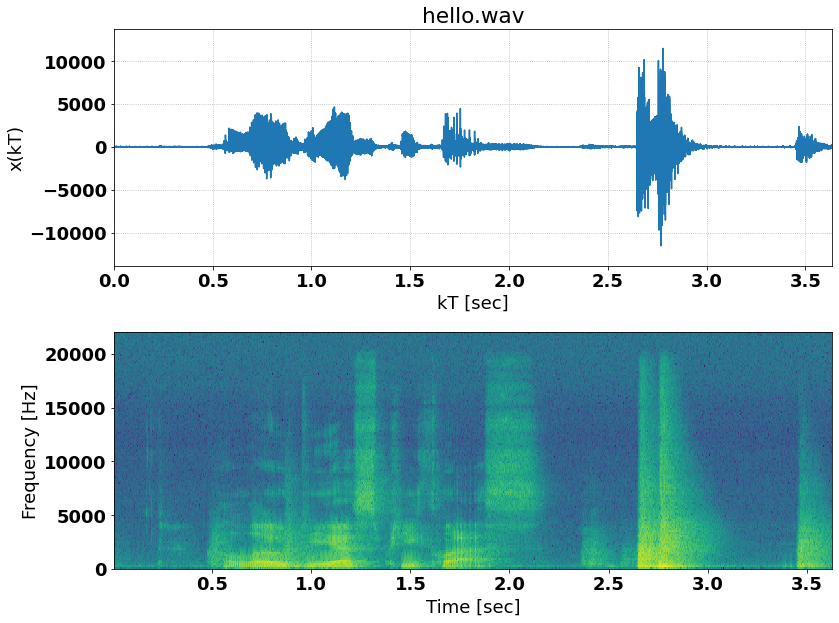

In [53]:
fname = 'hello.wav'
fs,x0 = wavfile.read(fname)

plot_sig(fs,x0,title=fname)

In [54]:
# Play Wav File
play(x0,fs)

## Butterworth Filter - Low or High Pass

### Define Filter

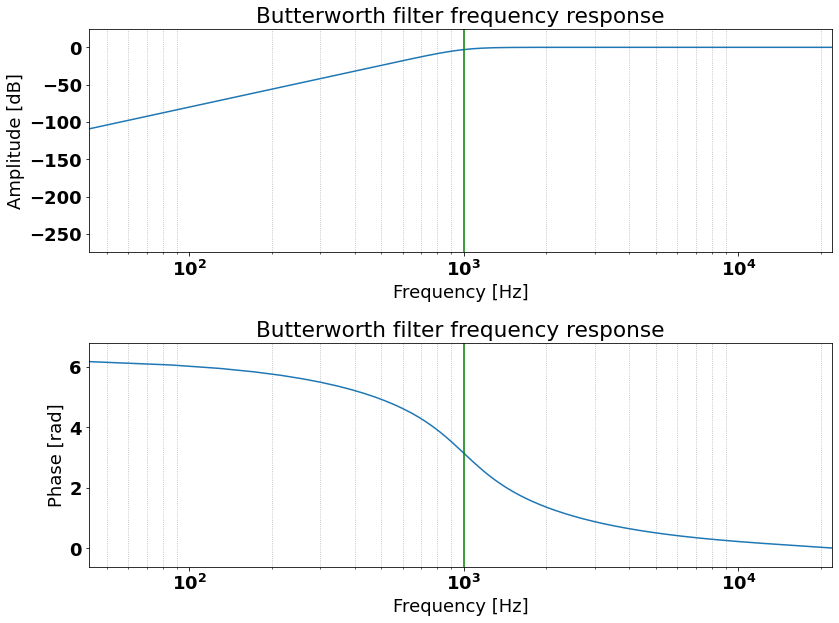

In [55]:
Wn    = 1000    # 3 dB Cutoff Frequency in Hz
btype = 'high'  # Choose 'low' or 'high'

b, a = signal.butter(4, Wn, btype, fs=fs)
w, h = signal.freqz(b, a)

f = (fs/2)*(w/(np.pi))

plt.subplot(211)
plt.plot(f, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(Wn, color='green') # cutoff frequency
#plt.ylim(-6,0)

plt.subplot(212)
plt.plot(f, np.unwrap(np.angle(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [rad]')
plt.grid(which='both', axis='both')
plt.axvline(Wn, color='green') # cutoff frequency

plt.tight_layout()
plt.show()

### Filter Signal

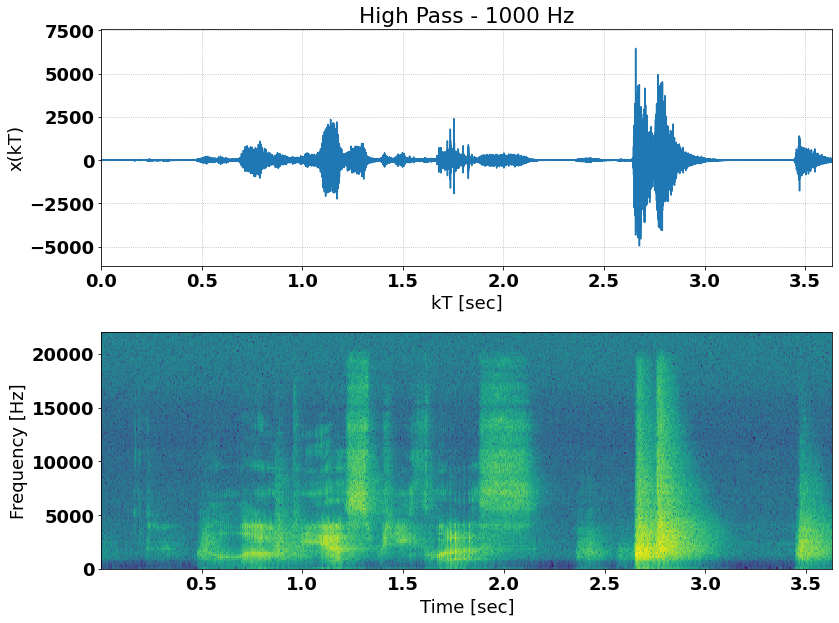

In [56]:
x1 = signal.filtfilt(b,a,x0)
plot_sig(fs,x1,title='{!s} Pass - {!s} Hz'.format(btype.capitalize(),Wn))

In [57]:
# Play Wav File
play(x1,fs)

## Butterworth Filter - Band Pass or Band Stop

### Define Filter

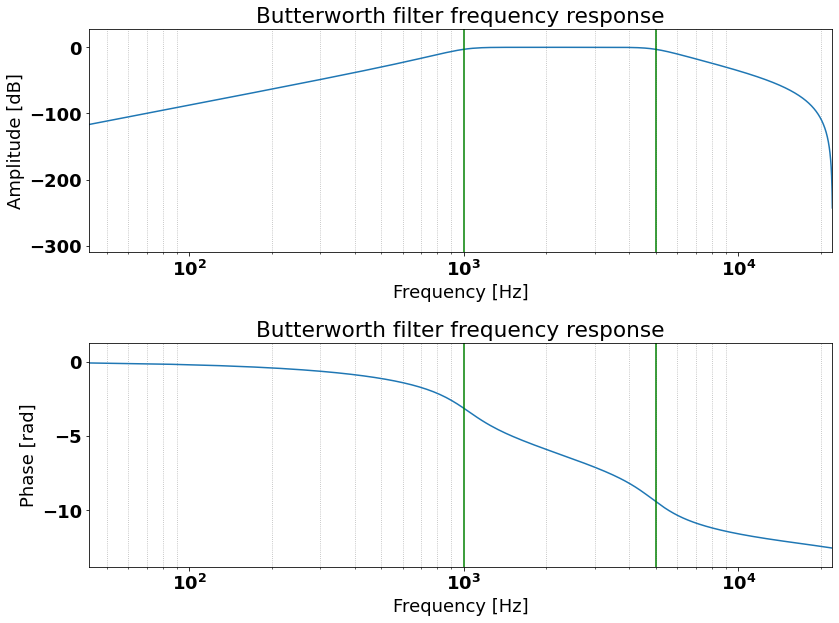

In [58]:
Wn    = (1000, 5000)    # 3 dB Cutoff Frequency in Hz
btype = 'bandpass'      # Choose 'bandpass' or 'bandstop'

b, a = signal.butter(4, Wn, btype, fs=fs)
w, h = signal.freqz(b, a)

f = (fs/2)*(w/(np.pi))

plt.subplot(211)
plt.plot(f, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(Wn[0], color='green') # cutoff frequency
plt.axvline(Wn[1], color='green') # cutoff frequency

#plt.ylim(-6,0)

plt.subplot(212)
plt.plot(f, np.unwrap(np.angle(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [rad]')
plt.grid(which='both', axis='both')
plt.axvline(Wn[0], color='green') # cutoff frequency
plt.axvline(Wn[1], color='green') # cutoff frequency

plt.tight_layout()
plt.show()

In [83]:
def plot_magphase(b, a, fs, title = None):
    
    w, h = signal.freqz(b, a)

    f = (fs/2)*(w/(np.pi))
    
    fig = plt.figure(figsize=(15,12))

    ax1 = fig.add_subplot(2,1,1)
    
    ax1.plot(f, 20 * np.log10(abs(h)))
    ax1.set_xscale('log')
    ax1.set_title(title)
    ax1.set_xlabel('Frequency [Hz]')
    ax1.set_ylabel('Amplitude [dB]')  
    ax1.grid(which='both', axis='both')
    ax1.axvline(Wn[0], color='green') # cutoff frequency
    ax1.axvline(Wn[1], color='green') # cutoff frequency

#plt.ylim(-6,0)

    ax2 = fig.add_subplot(2,1,2)
   
    ax2.plot(f, np.unwrap(np.angle(h)))
    ax2.set_xscale('log')
    ax2.set_title(title)
    ax2.set_xlabel('Frequency [Hz]')
    ax2.set_ylabel('Phase [rad]')
    ax2.grid(which='both', axis='both')
    ax2.axvline(Wn[0], color='green') # cutoff frequency
    ax2.axvline(Wn[1], color='green') # cutoff frequency

    plt.tight_layout()
    plt.show()
    

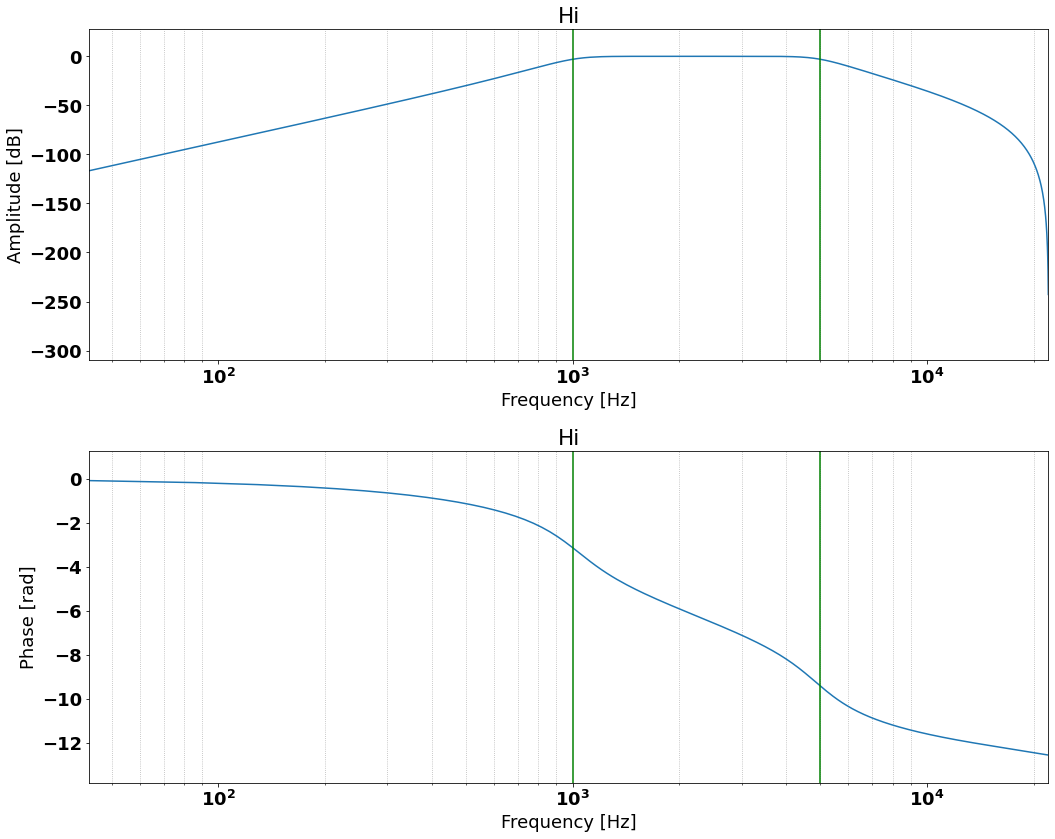

In [84]:
plot_magphase(b, a, fs, title = 'Hi')

### Filter Signal

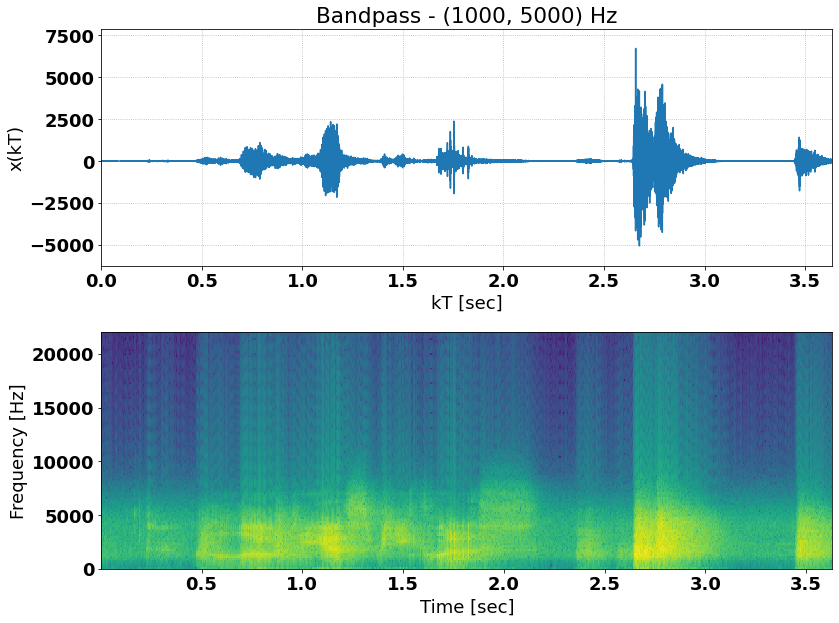

In [11]:
x2 = signal.filtfilt(b,a,x0)
plot_sig(fs,x2,title='{!s} - {!s} Hz'.format(btype.capitalize(),Wn))

In [12]:
# Play Wav File
play(x2,fs)